# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
cities[:5]#checking the cities variable 

['constantia', 'namibe', 'blackmans bay', 'buka', 'qaqortoq']

In [4]:
weather_api_key #checking the api key 

'059cc001a7c658700b18e0b9bc5fa219'

In [5]:
url = "https://api.geoapify.com/v1/geocode/search"
city_url = f"{url}?text={cities[0]}&format=json&apiKey={weather_api_key}"
city_url
weather_url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key + "&q=" + cities[0]
weather_url

'https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=059cc001a7c658700b18e0b9bc5fa219&q=constantia'

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# url = "https://api.geoapify.com/v1/geocode/search"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+ "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | buka
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | fisterra
Processing Record 9 of Set 1 | ust-nera
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | puerto baquerizo moreno
Processing Record 12 of Set 1 | broome
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | wanning
Processing Record 15 of Set 1 | the bottom
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | mitha tiwana
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | cairns city
City not found. Skipping...
Processing Record 22 of Set 1 | 

Processing Record 40 of Set 4 | chake chake
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | port douglas
Processing Record 43 of Set 4 | xicotencatl
Processing Record 44 of Set 4 | nyangao
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | orosei
Processing Record 47 of Set 4 | muzayri'
City not found. Skipping...
Processing Record 48 of Set 4 | kadod
Processing Record 49 of Set 4 | shenkursk
Processing Record 0 of Set 5 | slave lake
Processing Record 1 of Set 5 | anshun
Processing Record 2 of Set 5 | vanimo
Processing Record 3 of Set 5 | west island
Processing Record 4 of Set 5 | dzhangala
Processing Record 5 of Set 5 | ciudad lazaro cardenas
Processing Record 6 of Set 5 | sinabang
Processing Record 7 of Set 5 | kolonia town
Processing Record 8 of Set 5 | lira
Processing Record 9 of Set 5 | saryaghash
Processing Record 10 of Set 5 | margate
Processing Record 11 of Set 5 | taiohae
City not found. Skipping...
Processing Record 12

Processing Record 32 of Set 8 | el parral
Processing Record 33 of Set 8 | kangding
Processing Record 34 of Set 8 | mersa matruh
Processing Record 35 of Set 8 | masterton
Processing Record 36 of Set 8 | fiumicino-isola sacra
Processing Record 37 of Set 8 | grossalmerode
Processing Record 38 of Set 8 | muynoq
Processing Record 39 of Set 8 | bhachau
Processing Record 40 of Set 8 | uthal
Processing Record 41 of Set 8 | al mindak
Processing Record 42 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 43 of Set 8 | rukban
City not found. Skipping...
Processing Record 44 of Set 8 | las lomitas
Processing Record 45 of Set 8 | pacific grove
Processing Record 46 of Set 8 | katsuura
Processing Record 47 of Set 8 | behshahr
Processing Record 48 of Set 8 | glace bay
Processing Record 49 of Set 8 | san pedro
Processing Record 0 of Set 9 | semnan
Processing Record 1 of Set 9 | bani walid
Processing Record 2 of Set 9 | kish
Processing Record 3 of Set 9 | boras
Processing Record 4 of S

Processing Record 20 of Set 12 | anton lizardo
Processing Record 21 of Set 12 | sos'va
Processing Record 22 of Set 12 | jimena de la frontera
Processing Record 23 of Set 12 | sayat
Processing Record 24 of Set 12 | arzgir
Processing Record 25 of Set 12 | sadjoavato
City not found. Skipping...
Processing Record 26 of Set 12 | ribas do rio pardo
Processing Record 27 of Set 12 | alva
Processing Record 28 of Set 12 | salalah
Processing Record 29 of Set 12 | taitung city
Processing Record 30 of Set 12 | huangshan
Processing Record 31 of Set 12 | do'stlik shahri
City not found. Skipping...
Processing Record 32 of Set 12 | lido adriano
Processing Record 33 of Set 12 | mount pearl
Processing Record 34 of Set 12 | jawf al maqbabah
Processing Record 35 of Set 12 | buncrana
Processing Record 36 of Set 12 | kanniyakumari
Processing Record 37 of Set 12 | xai-xai
Processing Record 38 of Set 12 | cole harbour
Processing Record 39 of Set 12 | chinde
Processing Record 40 of Set 12 | vilyuysk
Processing 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,11.50,88,100,6.98,RO,1713887045
1,namibe,-15.1961,12.1522,25.41,73,98,4.12,AO,1713887254
2,blackmans bay,-43.0167,147.3167,10.29,91,100,1.79,AU,1713887306
3,buka,40.8108,69.1986,22.63,39,14,1.45,UZ,1713887306
4,qaqortoq,60.7167,-46.0333,4.98,75,100,0.85,GL,1713887306


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,11.50,88,100,6.98,RO,1713887045
1,namibe,-15.1961,12.1522,25.41,73,98,4.12,AO,1713887254
2,blackmans bay,-43.0167,147.3167,10.29,91,100,1.79,AU,1713887306
3,buka,40.8108,69.1986,22.63,39,14,1.45,UZ,1713887306
4,qaqortoq,60.7167,-46.0333,4.98,75,100,0.85,GL,1713887306


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

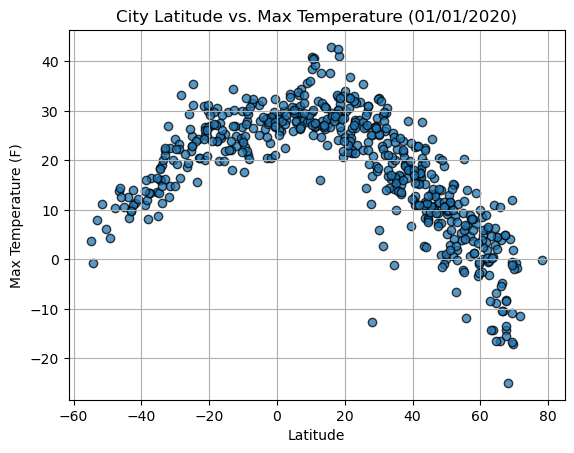

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#os.makedirs("output_data", exist_ok=True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

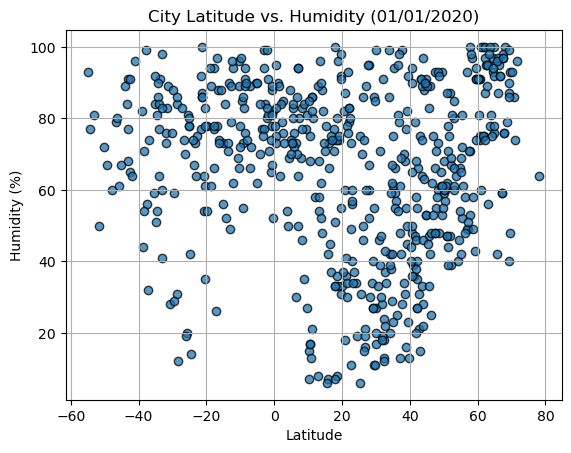

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

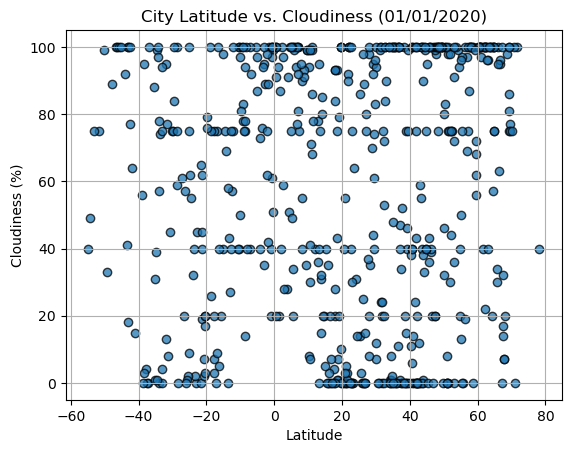

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

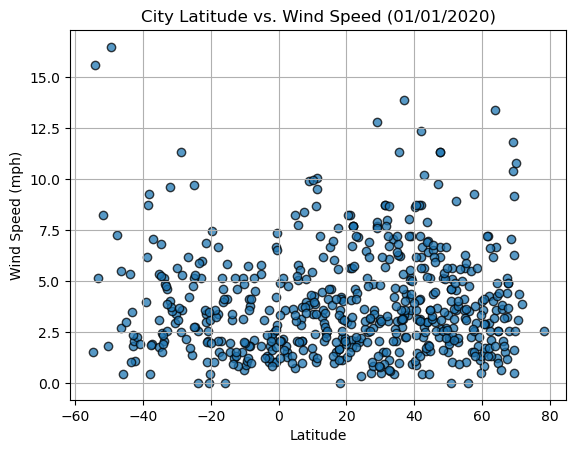

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,11.50,88,100,6.98,RO,1713887045
3,buka,40.8108,69.1986,22.63,39,14,1.45,UZ,1713887306
4,qaqortoq,60.7167,-46.0333,4.98,75,100,0.85,GL,1713887306
5,bethel,41.3712,-73.4140,17.42,36,0,3.09,US,1713887160
6,yellowknife,62.4560,-114.3525,-3.10,95,100,2.57,CA,1713887308


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,namibe,-15.1961,12.1522,25.41,73,98,4.12,AO,1713887254
2,blackmans bay,-43.0167,147.3167,10.29,91,100,1.79,AU,1713887306
9,ushuaia,-54.8000,-68.3000,3.79,93,40,1.54,AR,1713887308
10,puerto baquerizo moreno,-0.9000,-89.6000,28.55,65,20,6.69,EC,1713887308
12,grytviken,-54.2811,-36.5092,-0.70,77,49,15.62,GS,1713887149


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7381075493328516


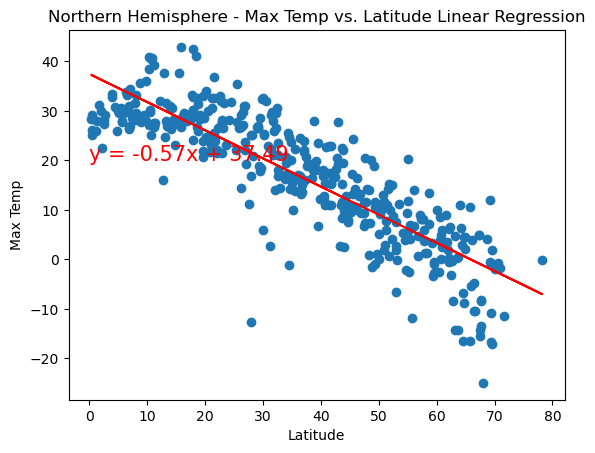

In [18]:
# Linear regression on Northern Hemisphere
# Extract the variables for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation on the plot
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Show plot
plt.show()

In [19]:
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,namibe,-15.1961,12.1522,25.41,73,98,4.12,AO,1713887254
2,blackmans bay,-43.0167,147.3167,10.29,91,100,1.79,AU,1713887306
9,ushuaia,-54.8000,-68.3000,3.79,93,40,1.54,AR,1713887308
10,puerto baquerizo moreno,-0.9000,-89.6000,28.55,65,20,6.69,EC,1713887308
12,grytviken,-54.2811,-36.5092,-0.70,77,49,15.62,GS,1713887149


The r-squared is: 0.6247747989101079


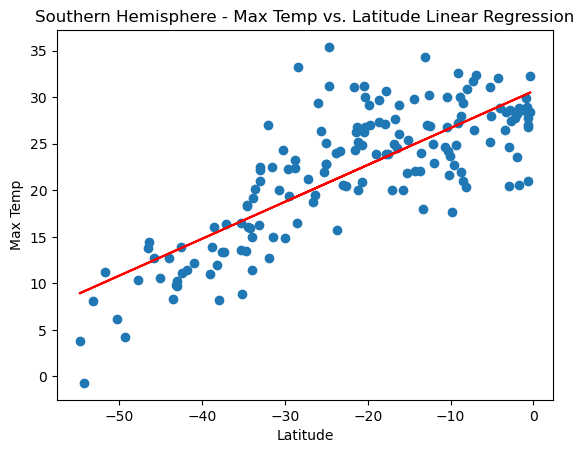

In [20]:
# Linear regression on Southern Hemisphere
# Extract the variables for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Plot linear regression on top of scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation on the plot
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Show plot
plt.show()


**Discussion about the linear relationship:** In this regression a direct correlation is shown between the distance further from the equator in either direction the colder it gets. Both r-square values show a good correlation between data sets.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03856499666809348


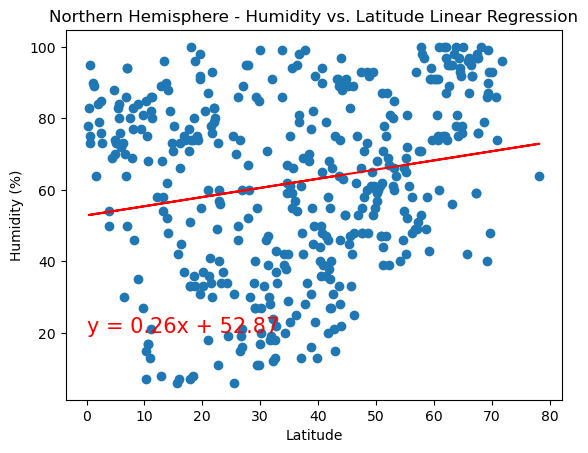

In [21]:
# Northern Hemisphere
# Extract the variables for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Plot linear regression on top of scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, 20), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Show plot
plt.show()

The r-squared is: 0.02994490647441974


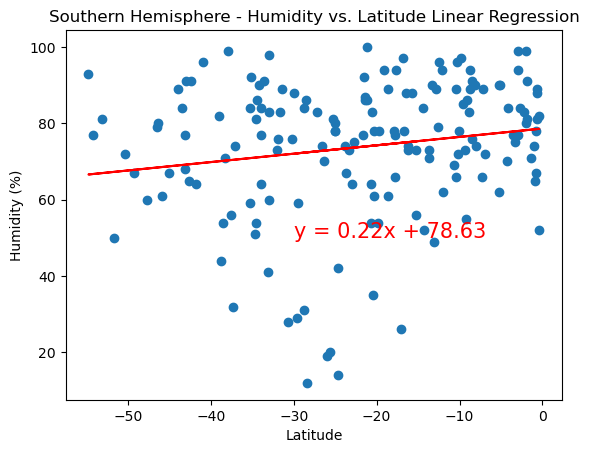

In [22]:
# Southern Hemisphere
# Extract the variables for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Plot linear regression on top of scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (-30, 50), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Show plot
plt.show()

**Discussion about the linear relationship:** In this regression the further north fron the equator there is a slight increase in humidity, and the further south fron the equator, there is slighter decrease in humidity. Both r-square values show a good correlation between data sets with the north being a bit better.

Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.016242748777917888


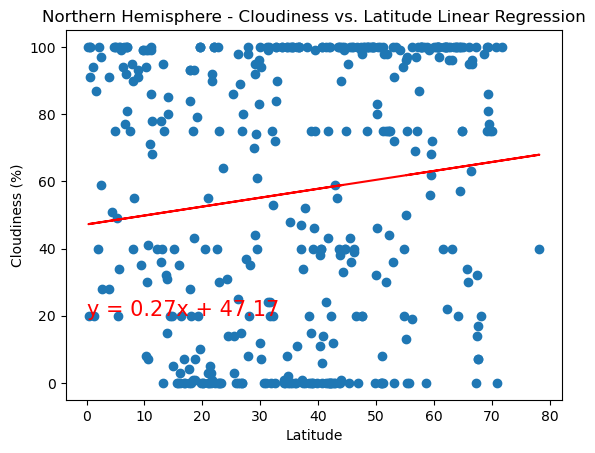

In [23]:
# Northern Hemisphere
# Extract the variables for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Plot linear regression on top of scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, 20), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Show plot
plt.show()

The r-squared is: 0.01723999832089372


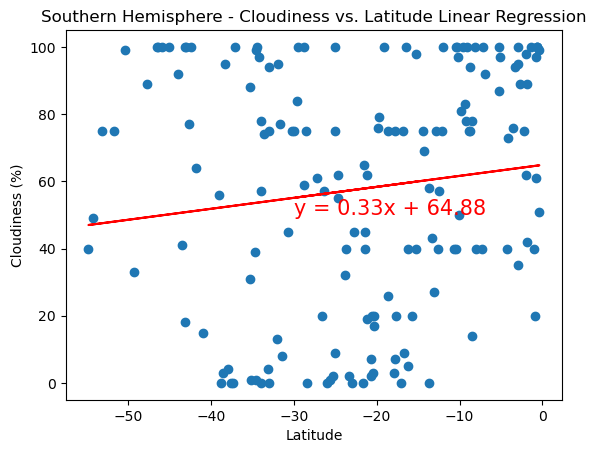

In [24]:
# Southern Hemisphere
# Extract the variables for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Plot linear regression on top of scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (-30, 50), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Show plot
plt.show()

**Discussion about the linear relationship:** In this linear regression a there is a slight rise in cloudiness the further north and a slight decrease the futther south. Both with low r-square values showing a week correlation between data sets.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0009119448590923282


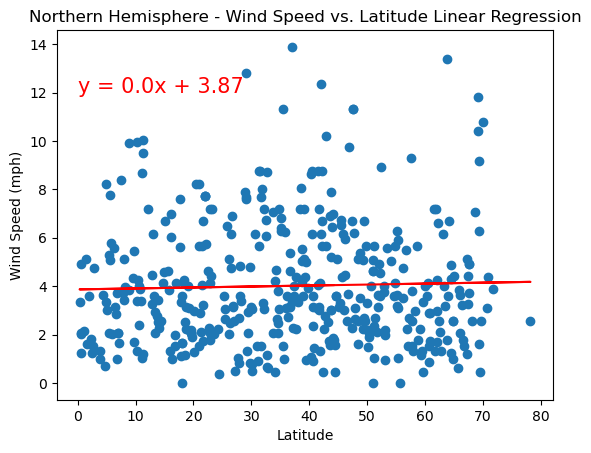

In [25]:
# Northern Hemisphere
# Extract the variables for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Plot linear regression on top of scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, 12), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Show plot
plt.show()

The r-squared is: 0.07859081725717902


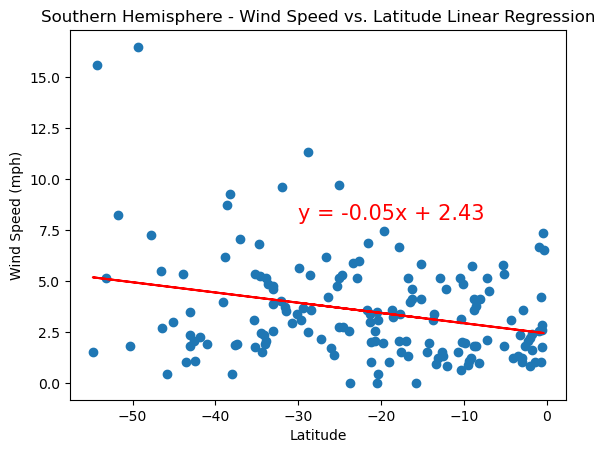

In [26]:
# Southern Hemisphere
# Extract the variables for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Plot linear regression on top of scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (-30, 8), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Show plot
plt.show()

**Discussion about the linear relationship:** This regression shows almost no change the further north and a slight rise the futher south. Both with low r-square values showing a week correlation between data sets.